K-means clustering

1. 임의로 k개의 중심점(centroid)을 생성
2. 각각의 점을 가장 가까운 중심점의 클러스터에 포함시킴
3. 각 클러스터에 포함된 점들을 평균내어 새로운 중심점을 계산
4. 클러스터에 변화가 없으면 종료

In [252]:
import numpy as np
import matplotlib.pyplot as plt

In [253]:
# K-means

def kmeans(k, points):
    prev_assignment = []

    # 1. 임의로 k개의 점을 중심적으로 선택 (forgy)
    centroids = points[np.random.choice(points.shape[0], replace=False, size=k)]

    for epoch in range(10):

        fig = plt.figure()
        # gca 함수 대신에 add_subplot 함수를 사용하였음
        ax = fig.add_subplot(projection='3d')
        ax.scatter(*zip(*points))
        ax.scatter(*zip(*centroids))
        plt.show()

        # 2. 가장 가까운 centroid 찾기
        assignments = []
        for p in points:
            dists = []

            for i, c in enumerate(centroids):
                dists.append(( ((p - c) ** 2).sum() ** 0.5, i) )

            assignments.append(min(dists)[1])

        new_centroids = np.zeros((k, points.shape[1]))
        counts = [0] * k

        for a, p in zip(assignments, points):
            new_centroids[a] += p
            counts[a] += 1

        for i in range(k):
            new_centroids[i] /= counts[i]

        centroids = new_centroids

        # 4. 수렴 조건 확인하기(클러스터에 변화가 없을 경우 종료)
        if prev_assignment == assignments:
            break
        prev_assignment = assignments
    
    return assignments, centroids

In [254]:
# 테스트 (데이터 생성)

points = [np.random.randn(3) for _ in range(30)]
points.extend([np.random.randn(3) + np.array([5, 5, 5]) for _ in range(30)])
points.extend([np.random.randn(3) + np.array([10, 5, 0]) for _ in range(30)])
points = np.array(points)

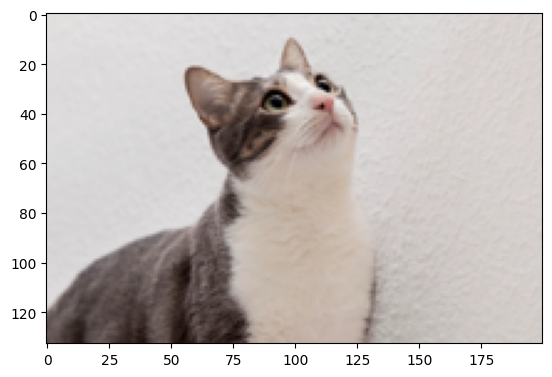

In [255]:
from PIL import Image

im = Image.open("cat.jpg")

# im.height : im.width = ? : 200 을 이용하여 아래에 대입
im = im.resize((200, im.height * 200 // im.width))

plt.imshow(im)
plt.show()

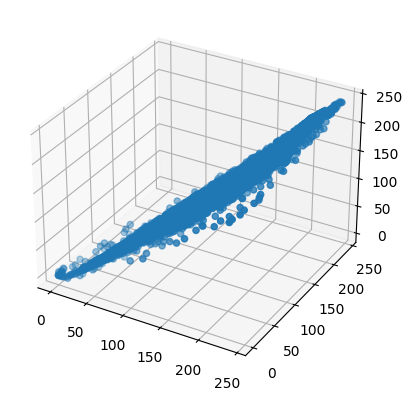

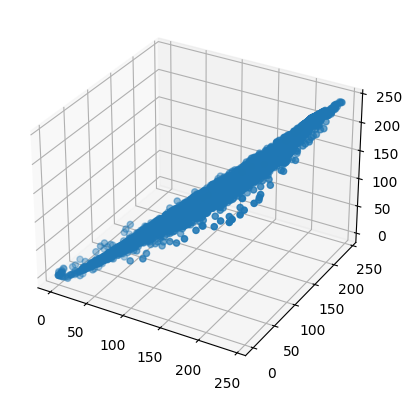

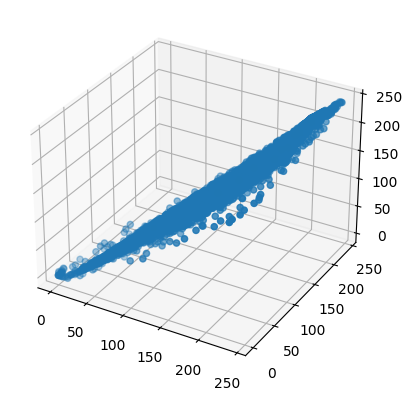

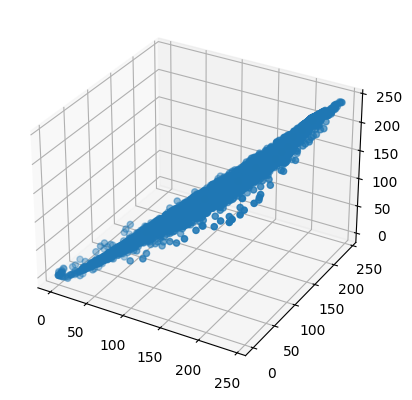

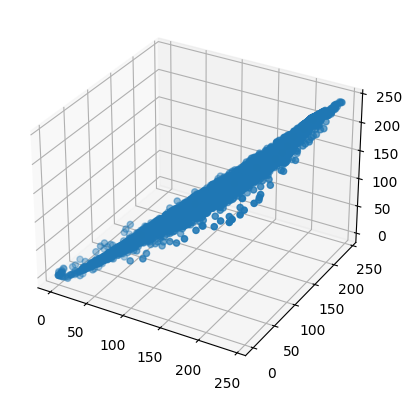

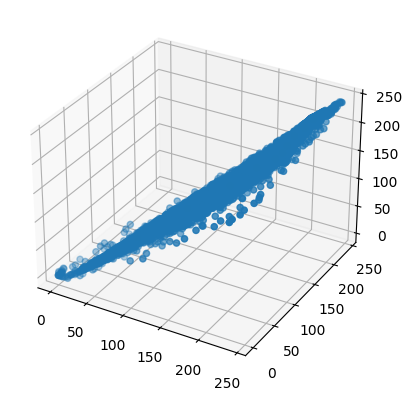

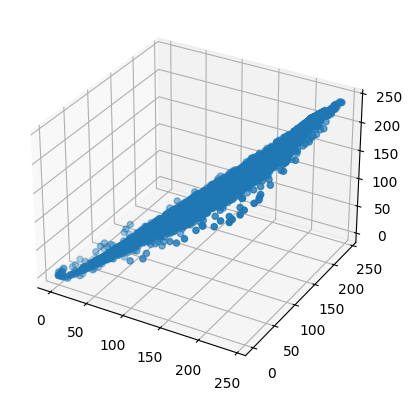

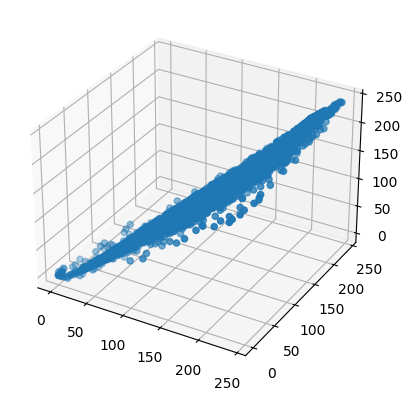

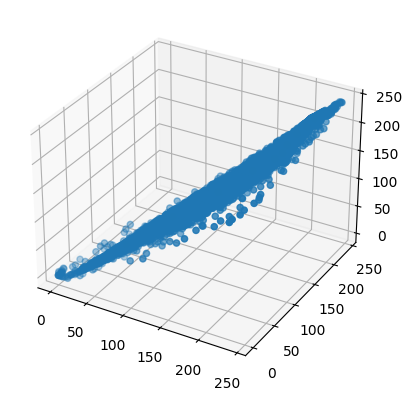

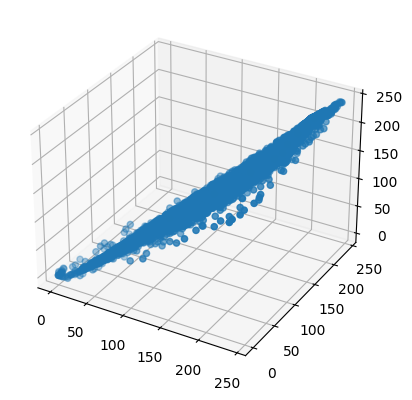

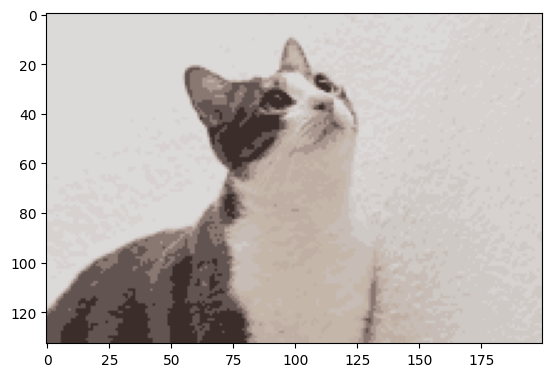

In [256]:
pixels = np.array(im).reshape(-1, 3)

assignments, centroids = kmeans(10, pixels)

for i, (a, p) in enumerate(zip(assignments, pixels)):
    pixels[i] = centroids[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()


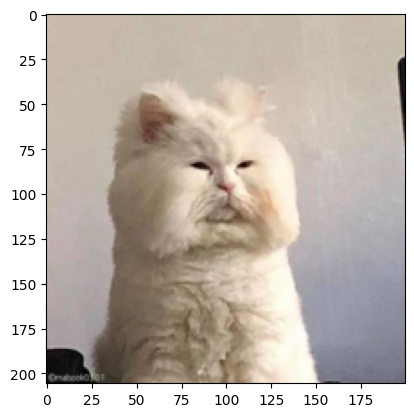

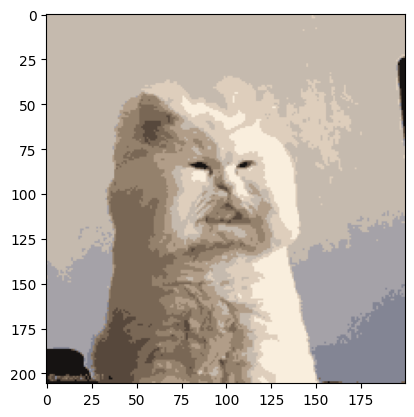

In [257]:
im2 = Image.open("cat2.jpg")

# im.height : im.width = ? : 200 을 이용하여 아래에 대입
im2 = im2.resize((200, im2.height * 200 // im2.width))

plt.imshow(im2)
plt.show()

pixels = np.array(im2).reshape(-1, 3)

# sklearn을 이용한 클러스터링

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(pixels)

for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
    pixels[i] = kmeans.cluster_centers_[a]

im2_remastered = Image.fromarray(pixels.reshape(im2.height, im2.width, 3), 'RGB')
plt.imshow(im2_remastered)
plt.show()

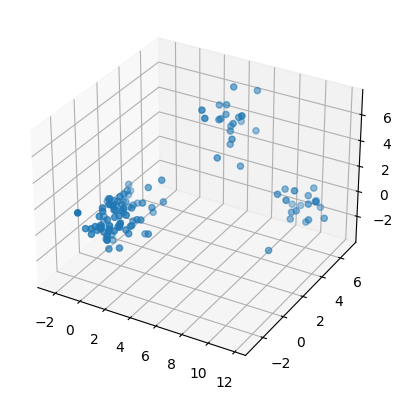

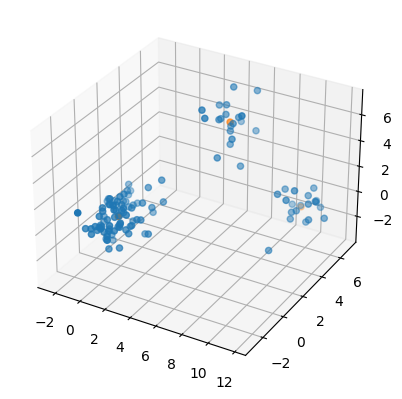

In [292]:
k = 3

points = [np.random.randn(k) for _ in range(80)]
points.extend([np.random.randn(k) + np.array([5, 5, 5]) for _ in range(20)])
points.extend([np.random.randn(k) + np.array([10, 5, 0]) for _ in range(20)])
points = np.array(points)


# 중간 결과 확인
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*zip(*points))
# 여기까지 kmeans 적용 전

kmeans = KMeans(n_clusters=k)
kmeans.fit(points)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*zip(*points))
ax.scatter(*zip(*kmeans.cluster_centers_))

plt.show()